In [ ]:
# Twitter Keyword and Topic Analysis.
# Created specifically for analysisng a random bunch of tweets to glean insights.
# By Swaptik Chowdhury
# Last Updated: July 30, 2021.


In [ ]:
import pandas as pd
import os # for chnaging working directory we need to import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer
import numpy as np
import scipy
from pprint import pprint
import gensim

#...................................
#from platform import python_version
#print(python_version())
#.....................................
#pip list to see all available packages
#https://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy: To locate any whl file for other packages
#......................................
# For hard to install packages refer: https://medium.com/@shivangisareen/for-anyone-using-jupyter-notebook-installing-packages-18a9468d0c1c
# To install Wordcloud package
#import sys
#!{sys.executable} -m pip install wordcloud-1.8.1-cp38-cp38-win_amd64.whl
# To install gensim package
#import sys
#!{sys.executable} -m pip install gensim-4.0.1-cp38-cp38-win_amd64.whl
# To update the pip
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip setuptools
# To install pprint for LDA model training
#import sys
#!{sys.executable} -m pip install pprintpp-0.4.0-py2.py3-none-any.whl
# To install funcy which is required package for installing gensim_models from pyLDAvis
#import sys
#!{sys.executable} -m pip install funcy-1.16-py2.py3-none-any.whl
# To install Levenshtein package associated with pprint or gensim
#import sys
#!{sys.executable} -m pip install python_Levenshtein-0.12.2-cp38-cp38-win_amd64.whl
#......................................


In [ ]:
os.getcwd() # to see working directory
os.chdir("C:\\Users\\schowdhu\\Downloads\\Summer 2021\\TNL Residency - 1\\Twitter_Data_python_script") # to change directory

In [ ]:
df=pd.read_excel("Extracted 5-4-2021_All Character_#_March 1-2 2020.xlsx") # reading the excel with just tweets
# df.head() # Just to explore data

In [ ]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls.\S+ matches any character that isn't whitespace & is opposite of\s
    text=re.sub(r'\S+\.com\S+','',text) #remove urls."" mean no space or nothing
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    text =re.sub(r"^RT\s+",'',text) #remove rt's
    return text

In [ ]:
def process_text(text, stem= False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets(?), Lower is method applied to string text; matching each word in text-replacing with lower version
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stopwords.words("english")
    ]
    if stem:
        stemmer = PorterStemmer() # initializig a poterstemmer object
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

# String.join(iterable).The join() method takes all items in an iterable and joins them into one string.
# Example: let myTuple = ("John", "Peter", "Vicky"), x = "#".join(myTuple), print(x),  John#Peter#Vicky


In [ ]:
df['cleaned_tweets']=df['tweet'].apply(lambda x: process_text(x,True))



In [ ]:
df['NoURLMention#_tweets']=df['tweet'].apply(lambda x: remove_content(x)) # To be used for sentiment analysis. Run Later
# print (df["cleaned_tweets"]) # Use it to check the df columns

In [ ]:
# Creating the corpus from tweets for TF, IDF and Topic modelling

temp=' '.join(df['cleaned_tweets'].tolist())

# The following line basically take the columns of the df, convert it to a list and then join them together using "" to...
# ...create a corpus.
# tolist() converts cleaned_tweets(a series) to a list.# The columns in any data frame are series.
# Check by using type(df["cleaned_tweets"])

corpus = temp.split(" ") # This splits and stores the "temp" as list consisting of words.To subset a list/array use: listname [Start_index:end_index]
s
tf_idf_corpus = [temp] # The entire corpus is one entry in the list

topic_modelling_corpus = df['cleaned_tweets'].tolist()

In [ ]:
topic_modelling_corpus.head()

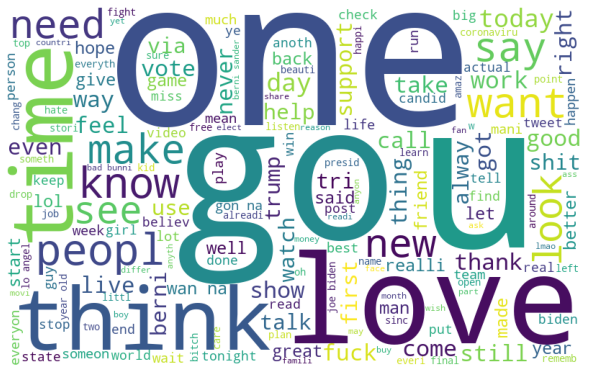

In [ ]:
# Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

           index    0
0         wan na  537
1         gon na  477
2      look like  328
3      joe biden  325
4       year old  304
5      feel like  281
6       lo angel  281
7      bad bunni  273
8   berni sander  266
9  super tuesday  253


<AxesSubplot:xlabel='index'>

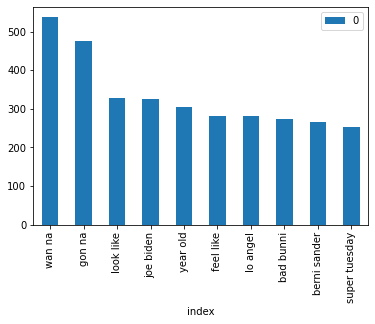

In [ ]:
# This calculates the TF (count of word K in ith doc)

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2)) # (ngram range as 2,2 will give bigram, 3,3 will trigram, etc.)
word_count_vector=cv.fit_transform(tf_idf_corpus)# This creates a word count vector. Note the corpus is list
words=pd.DataFrame(word_count_vector.sum(axis=0),columns=cv.get_feature_names())
words_T = words.T
words_T_sorted=words_T.sort_values(0,ascending=False).reset_index() # reset is providing a column heading for sort below
res = words_T_sorted.head(10) # for top 10 words. Head (n) provide n top values
print(res)
res.plot.bar(x="index",y=0)

print(tf)
tf.plot.bar(x="index",y=0)

In [ ]:
# Note that c has method "get.feature.name" and X has method "sum" becuase the matrix thorugh which X is being calculated is arrived...
# ...through fit transform and c is creating the bag of words through which we get the feature names. The script on the "words"...
# ...line is creating a data frame with data from X.Sum.Column heading as words and rows as freq of each words...
# ...(conatins frequency of all words) similar to https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
# As words is a df with words as each column heading and frequency as another row as shown in above link, we need to...
# ...swap rows and column for sorting
# When we reset the index, the old index is added as a column, and a new sequential index is used. Check by removing & keeping...
# ..."reset_index" and print("enter name of df (words_T_Sorted)")

In [ ]:
# This calculates the IDF (count of word K in ith doc)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
print (idf)



                feature_name  idf_weights
0                         aa          1.0
1                        aaa          1.0
2                     aaaaaa          1.0
3                 aaaaaaaaaa          1.0
4      aaaaaaaaaaaaaaahhhhhh          1.0
...                      ...          ...
24953                   zuni          1.0
24954                 zuniga          1.0
24955                     zy          1.0
24956                  zyphr          1.0
24957                     zz          1.0

[24958 rows x 2 columns]


C:\Users\schowdhu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#This calculates TF-IDF. Higher the weight original is the word

tf_idf = pd.DataFrame(X.toarray() ,columns=cv.get_feature_names())

# Imagine tf-idf as weighted word frequency , tf is actual frequency multiplied by weight idf to account for rarity

tf_idf_T = tf_idf.T
tfidf_T_sorted=tf_idf_T.sort_values(0,ascending=False).reset_index()
print(tfidf_T_sorted.head(20))



    index         0
0    like  0.272944
1     get  0.242258
2     one  0.169456
3      go  0.158772
4   peopl  0.156784
5    time  0.153368
6    love  0.152809
7    want  0.138335
8    know  0.129639
9     day  0.120508
10   make  0.119265
11    say  0.117588
12   vote  0.115228
13   need  0.114420
14    see  0.112246
15    new  0.111936
16  think  0.108581
17   year  0.108271
18   good  0.099264
19     us  0.099201


C:\Users\schowdhu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# The next goal is topic modelling using LDA method and gensim package..
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-2/

#Preparing data for LDA Analysis

from gensim.corpora.dictionary import Dictionary
from nltk import word_tokenize
#tokenized_docs = word_tokenize(temp). #Because I am using corpus2 = temp.split which already tokenize
text = [corpus]
id2word = Dictionary(text)
gensim_corpus = [id2word.doc2bow(text) for text in text]# Gensim corpus =tupple where first is id from dict and second is freq
#print(gensim_corpus[0])

C:\Users\schowdhu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#LDA model training

num_topics = 10 # Number of topics
lda_model = gensim.models.LdaMulticore(corpus=gensim_corpus, id2word=id2word, num_topics=num_topics) # Building LDA model
pprint(lda_model.print_topics()) # Printing the keywords of 10 topics
doc_lda = lda_model[gensim_corpus] # doc_lda is gensim transformed corpus

# for error "oc2bow expects an array of unicode tokens on input, not a single string": See below
#https://stackoverflow.com/questions/49784513/typeerror-doc2bow-expects-an-array-of-unicode-tokens-on-input-not-a-single-str?noredirect=1&lq=1


C:\Users\schowdhu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.009*"like" + 0.009*"get" + 0.006*"peopl" + 0.006*"one" + 0.006*"love" + '
  '0.005*"want" + 0.004*"go" + 0.004*"make" + 0.004*"say" + 0.004*"time"'),
 (1,
  '0.009*"like" + 0.008*"get" + 0.005*"peopl" + 0.005*"one" + 0.005*"love" + '
  '0.005*"go" + 0.004*"know" + 0.004*"day" + 0.004*"want" + 0.004*"time"'),
 (2,
  '0.009*"like" + 0.007*"get" + 0.005*"go" + 0.005*"one" + 0.005*"new" + '
  '0.004*"want" + 0.004*"peopl" + 0.004*"time" + 0.004*"vote" + 0.004*"know"'),
 (3,
  '0.007*"get" + 0.007*"like" + 0.006*"time" + 0.005*"go" + 0.004*"love" + '
  '0.004*"peopl" + 0.004*"need" + 0.004*"one" + 0.004*"want" + 0.004*"see"'),
 (4,
  '0.009*"get" + 0.006*"go" + 0.006*"like" + 0.005*"one" + 0.005*"peopl" + '
  '0.005*"time" + 0.005*"love" + 0.004*"know" + 0.004*"want" + 0.004*"think"'),
 (5,
  '0.010*"like" + 0.007*"get" + 0.005*"peopl" + 0.005*"one" + 0.005*"go" + '
  '0.005*"love" + 0.005*"see" + 0.005*"want" + 0.004*"day" + 0.004*"know"'),
 (6,
  '0.009*"like" + 0.007*"time" + 0

In [ ]:
#Analysing LDA model results. The output from simple LDA model is not easy to visualise;use pyLDAvis

import pyLDAvis
import pickle5
from pyLDAvis import gensim_models

pyLDAvis.enable_notebook() # enable_notebook: enable automatic D3 display of prepared model data in the IPython notebook.

LDAvis_data_filepath ="C:\\Users\\schowdhu\\Downloads\\Spring Quarter 2021\\TNL Residency - 1\\Twitter_Data_python_script\\ldavis_prepared"

# # this is a bit time consuming - make the if statement True if you want to execute visualization prep yourself
if 1 == 0:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, gensim_corpus, id2word)
    # Prepare: transform and prepare a LDA model’s data for visualization
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle5.dump(LDAvis_prepared, f)

# loading the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f: # for info on rb and pickling https://www.pitt.edu/~naraehan/python3/pickling.html
    LDAvis_prepared = pickle5.load(f)

pyLDAvis.save_html(LDAvis_prepared, "lda.html")

LDAvis_prepared

C:\Users\schowdhu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.002250 -0.000435       1        1  42.880761
2      0.002025  0.000327       2        1  38.048317
3      0.001371 -0.000932       3        1   8.362710
8     -0.000168  0.001419       4        1   4.033958
9      0.000753  0.000892       5        1   3.835538
1     -0.000067  0.001953       6        1   1.257812
0     -0.000488 -0.001360       7        1   0.834709
4     -0.000845 -0.001404       8        1   0.508630
7     -0.001778 -0.001541       9        1   0.189335
6     -0.003053  0.001081      10        1   0.048231, topic_info=        Term         Freq        Total Category  logprob  loglift
12652   like  4523.000000  4523.000000  Default  30.0000  30.0000
8691     get  3966.000000  3966.000000  Default  29.0000  29.0000
15625    one  2517.000000  2517.000000  Default  28.0000  28.0000
22092   time  2698.000000  2698.000000  Default  27.0000  27.0000
16396  peopl  2448.000000  2448.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
19089    say     0.807409  2075.257764  Topic10  -5.6881  -0.2148
8974    good     0.658428  1526.717647  Topic10  -5.8921  -0.1118
13262   make     0.689256  1812.784407  Topic10  -5.8463  -0.2378
22559  trump     0.639984  1574.683017  Topic10  -5.9205  -0.1712
21850  thank     0.615767  1318.159915  Topic10  -5.9591  -0.0319

[948 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
122        1  0.439418  accid
122        2  0.384491  accid
122        3  0.054927  accid
122        4  0.054927  accid
122        5  0.054927  accid
...      ...       ...    ...
24746      7  0.009004    yet
24746      8  0.006003    yet
24746      9  0.003001    yet
24849      1  0.297687   yuck
24849      2  0.297687   yuck

[3116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 4, 9, 10, 2, 1, 5, 8, 7])